In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.5)

In [44]:
df = pd.read_csv('data/paris_listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,26660141,https://www.airbnb.com/rooms/26660141,20220606014139,2022-06-07,"CHARMANT APPARTEMENT, 50M2 AUX PORTES DE PARIS","Charmant appartement avec petit balcon filant,...",La rue principale à la sortie du métro est trè...,https://a0.muscache.com/pictures/a776b332-0fde...,200407698,https://www.airbnb.com/users/show/200407698,...,5.00,4.88,4.94,NaN,f,1,1,0,0,0.38
1,25177338,https://www.airbnb.com/rooms/25177338,20220606014139,2022-06-07,Cosy and quiet appartement at Les Lilas,<b>The space</b><br />Le logement est situé da...,NaN,https://a0.muscache.com/pictures/e984c1e4-6d40...,185793394,https://www.airbnb.com/users/show/185793394,...,4.56,4.50,4.56,NaN,t,1,1,0,0,0.35
2,25218084,https://www.airbnb.com/rooms/25218084,20220606014139,2022-06-07,paris avec une maison,une maison restaurée et faite à notre image ap...,Être dans un véritable maison avec un parc à q...,https://a0.muscache.com/pictures/dbfc69a1-76cb...,190542280,https://www.airbnb.com/users/show/190542280,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.05
3,23135649,https://www.airbnb.com/rooms/23135649,20220606014139,2022-06-07,"Charming studio, Pont de Neuilly - Paris",Studio apartment in the heart of the prestigio...,The Saint James district of Neuilly sur Seine ...,https://a0.muscache.com/pictures/58399f3d-c271...,171938056,https://www.airbnb.com/users/show/171938056,...,4.94,4.87,4.61,NaN,f,1,0,1,0,0.65
4,23259887,https://www.airbnb.com/rooms/23259887,20220606014139,2022-06-07,A cosy appartement,Situé dans un quartier agréable proche de Chât...,NaN,https://a0.muscache.com/pictures/ad0ade9c-89d5...,20135501,https://www.airbnb.com/users/show/20135501,...,4.86,4.91,4.65,NaN,t,1,1,0,0,0.87


In [45]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [46]:
df.shape

(56739, 74)

## Cleaning the price column

In [47]:
df['price_cleansed'] = df['price'].str.replace('$','').replace(',','',regex=True).astype(float)
df['price_cleansed'].value_counts()

80.0      2022
100.0     1997
60.0      1925
70.0      1867
90.0      1733
          ... 
1192.0       1
2001.0       1
2721.0       1
711.0        1
1855.0       1
Name: price_cleansed, Length: 1276, dtype: int64

In [48]:
df['price_cleansed'].mean()

163.96459225576763

In [49]:
df['price_cleansed'].median()

97.0

## Filters (conditions)

In [50]:
def create_hist(df,title='',xlabel = 'x', ylabel='y'):
    plt.figure(figsize=(15,8))
    sns.histplot(df,stat='percent', bins=20)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    

In [51]:
price_limit = 500
min_reviews = 12
bus_units = 2
local_units = 2

# Is more expensive to stay at an airbnb's superhost airbnb?

In [52]:
data_super_host = df[(df['host_is_superhost']=='t') & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']
data_not_super_host = df[(df['host_is_superhost'] == 'f') & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']

print(f'Mean price of super host listings: € {data_super_host.mean():.2f}')
print(f'Median price of super host listings: € {data_super_host.median():.2f}')
print(f'Total of super host listings: {len(data_super_host)}')
print('-----------------------------------------------------')
print(f'Mean price of regular host listings: € {data_not_super_host.mean():.2f}')
print(f'Median price of regular host listings: € {data_not_super_host.median():.2f}')
print(f'Total of regular host listings: {len(data_not_super_host)}')

Mean price of super host listings: € 143.57
Median price of super host listings: € 116.00
Total of super host listings: 3515
-----------------------------------------------------
Mean price of regular host listings: € 147.99
Median price of regular host listings: € 120.00
Total of regular host listings: 5740


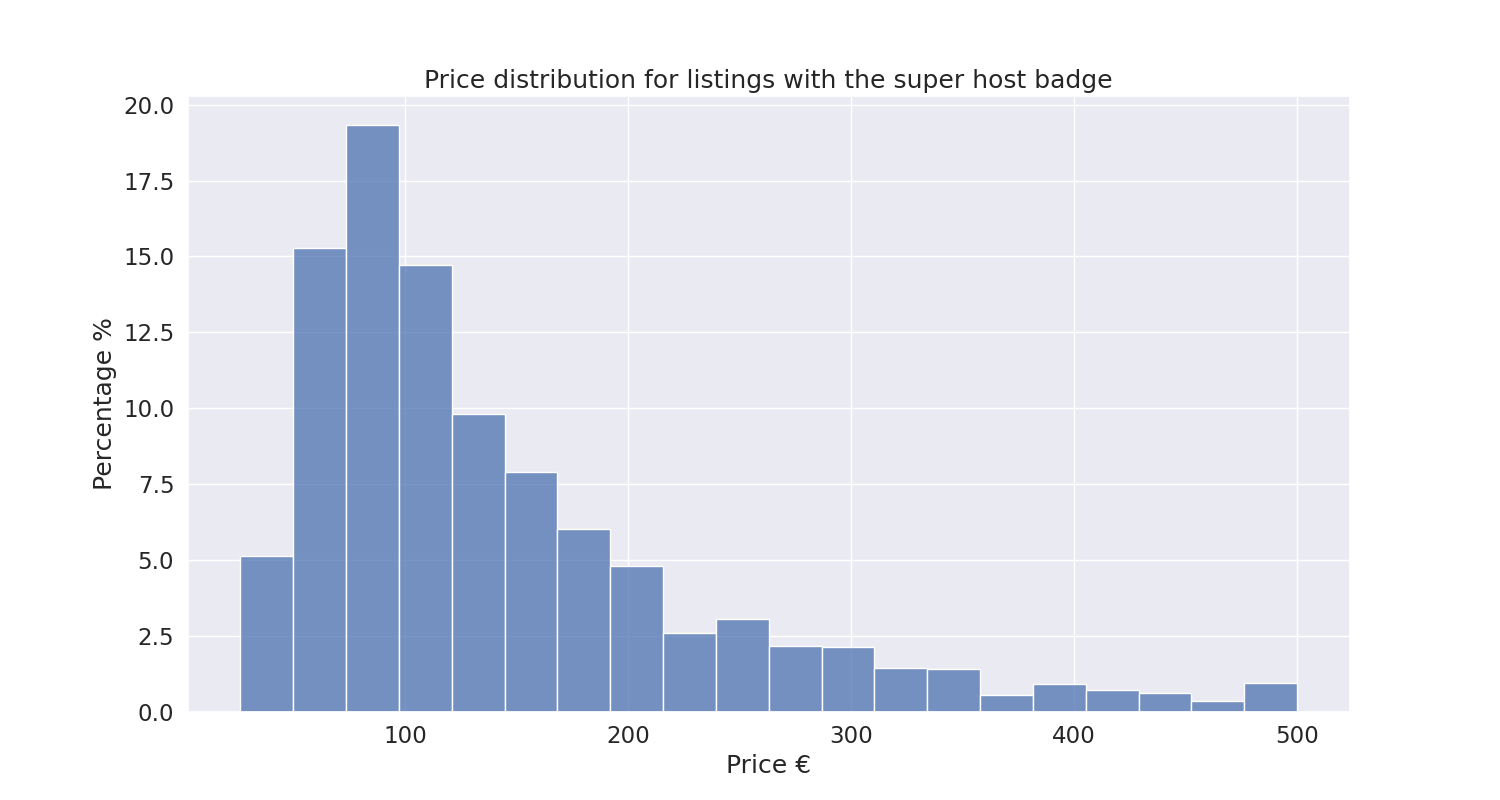

In [53]:
create_hist(data_super_host,f'Price distribution for listings with the super host badge',xlabel = 'Price €', ylabel='Percentage %')

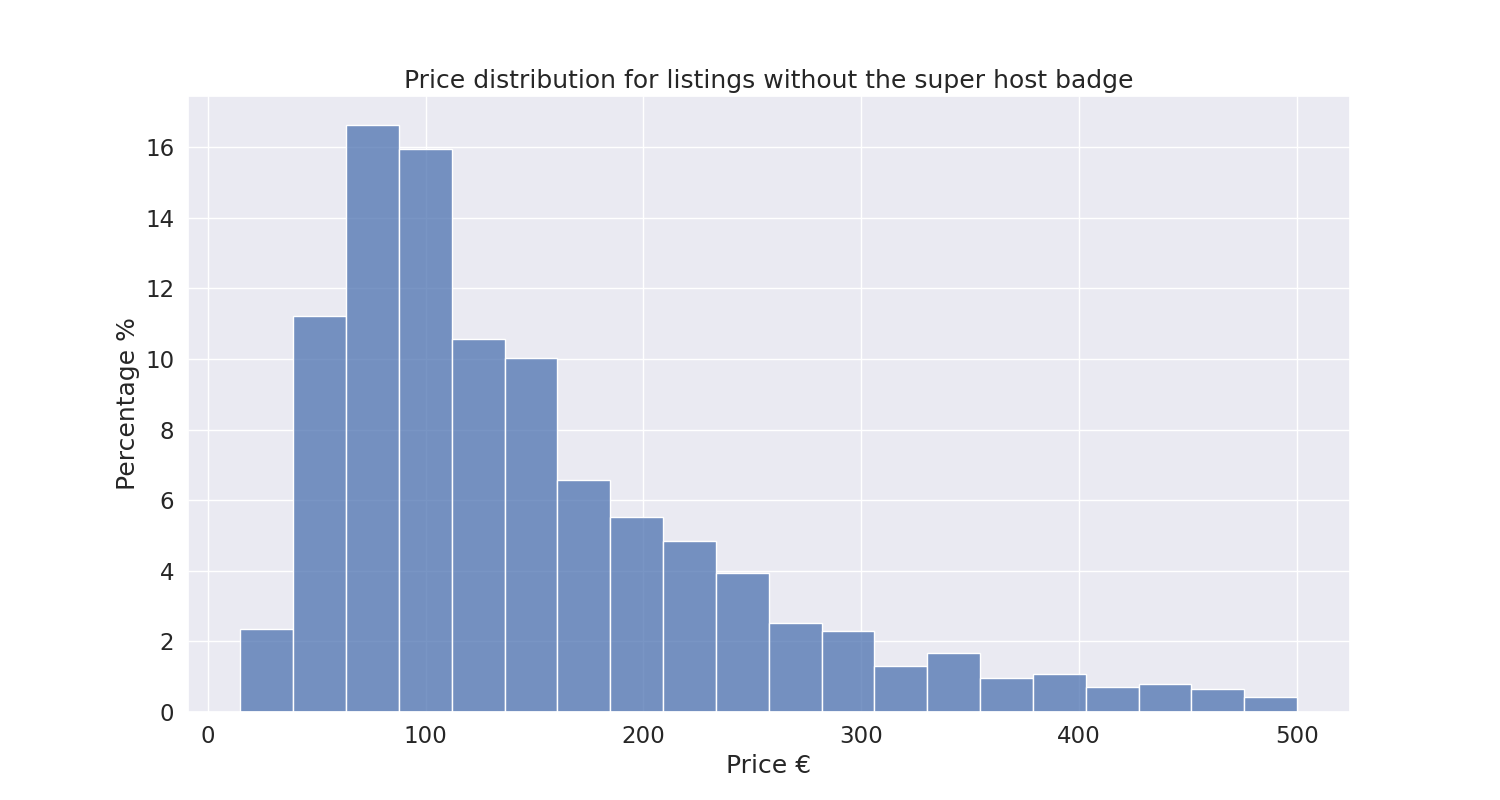

In [54]:
create_hist(data_not_super_host,f'Price distribution for listings without the super host badge',xlabel = 'Price €', ylabel='Percentage %')

# How "professional" hosts impact the airbnb prices? 

In [55]:
ml = df[(df['property_type']=='Entire rental unit')]['calculated_host_listings_count_entire_homes'].value_counts().sort_index()
ml_clean = pd.concat([ml.iloc[1:9], pd.Series(np.sum(ml.iloc[9:]))],ignore_index=True)

In [56]:
ml

1      32430
2       2343
3        615
4        384
5        303
       ...  
156      140
194      192
199      199
203      199
233      228
Name: calculated_host_listings_count_entire_homes, Length: 68, dtype: int64

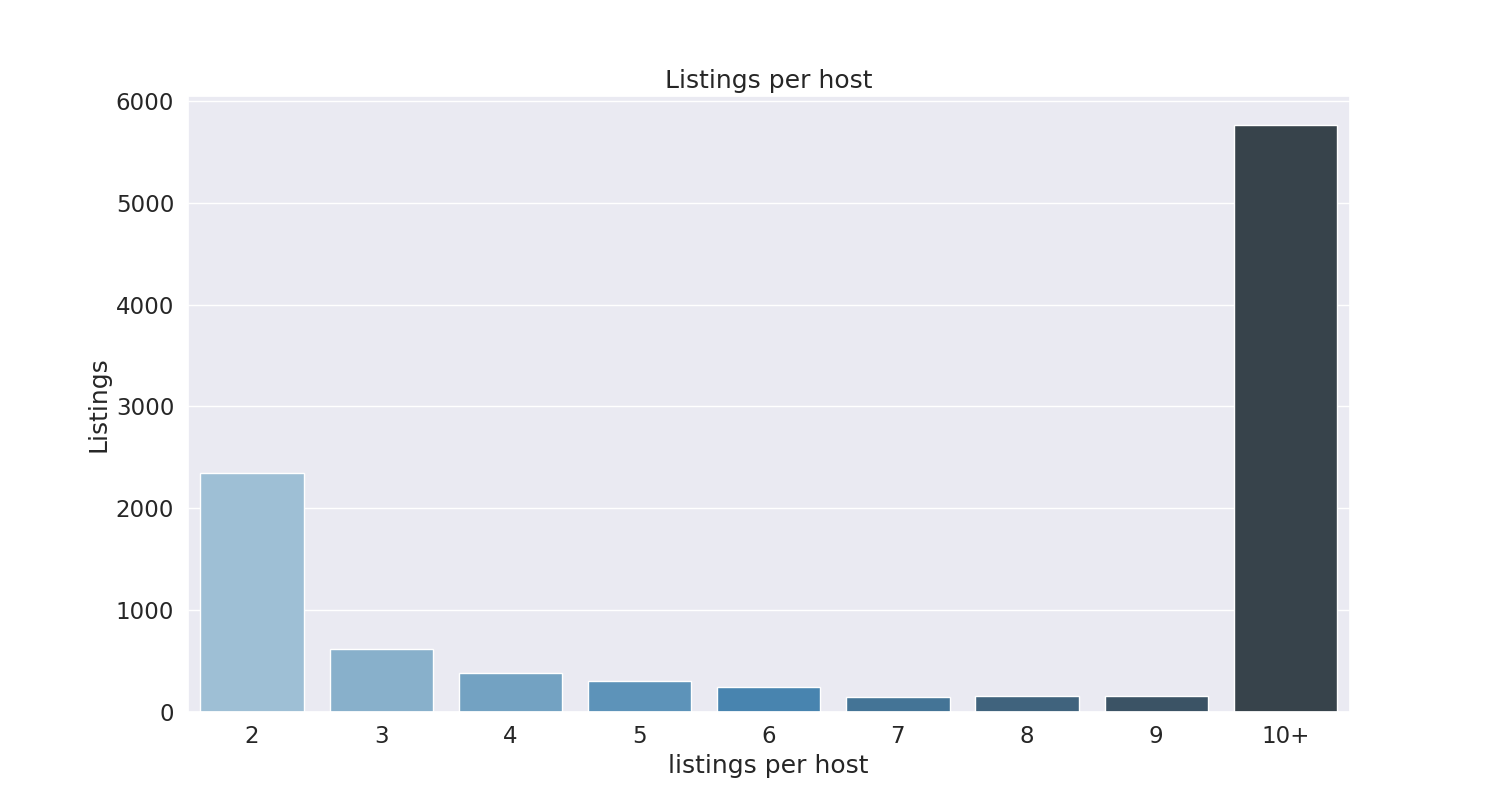

In [57]:
plt.figure(figsize=(15,8))
plt.title('Listings per host')
plt.xlabel('listings per host')
plt.ylabel('Listings')
sns.barplot(x=['2','3','4','5','6','7','8','9','10+'],y=ml_clean,palette="Blues_d")
plt.show()

In [58]:
data_bus = df[(df['property_type']=='Entire rental unit') & (df['calculated_host_listings_count_entire_homes'] >= bus_units) & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']
data_local = df[(df['property_type']=='Entire rental unit') & (df['calculated_host_listings_count_entire_homes'] <  local_units) & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']

print(f'Mean price for business: €{data_bus.mean():.2f}')
print(f'Median price for business:  €{data_bus.median():.2f}')
print(f'Total of business listings: {len(data_bus)}')
print('------------------------------------------------')
print(f'Mean price for local: €{data_local.mean():.2f}')
print(f'Median price for local: €{data_local.median():.2f}')
print(f'Total of local listings: {len(data_local)}')


Mean price for business: €191.86
Median price for business:  €166.00
Total of business listings: 2690
------------------------------------------------
Mean price for local: €128.51
Median price for local: €107.00
Total of local listings: 4047


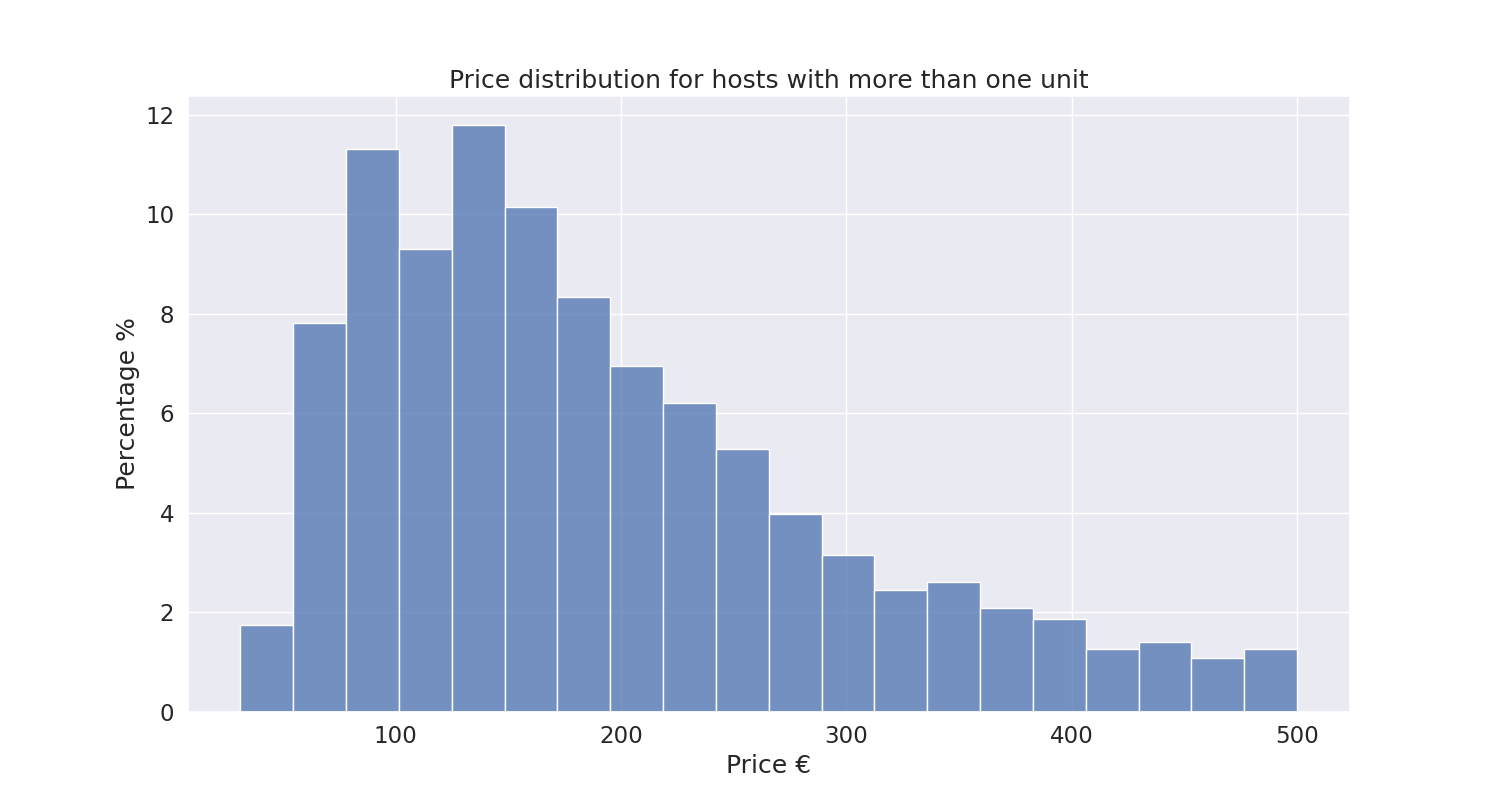

In [59]:
create_hist(data_bus,f'Price distribution for hosts with more than one unit',xlabel = 'Price €', ylabel='Percentage %')

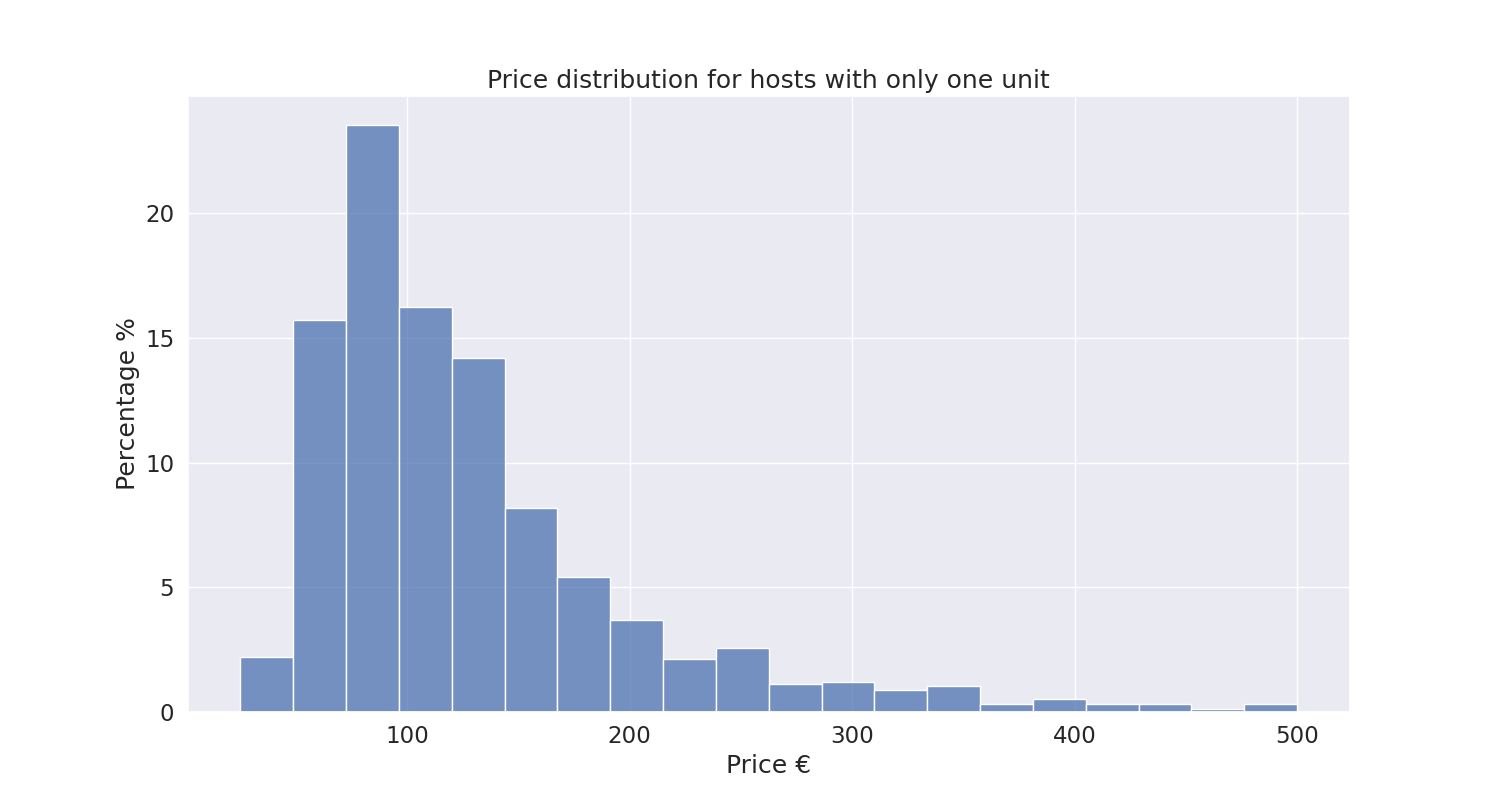

In [60]:
create_hist(data_local,'Price distribution for hosts with only one unit',xlabel = 'Price €', ylabel='Percentage %')

In [61]:
data_scoring_unique = df[(df['property_type']=='Entire rental unit') & (df['calculated_host_listings_count_entire_homes'] < local_units) & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['review_scores_rating']
data_scoring_multiple = df[(df['property_type']=='Entire rental unit') & (df['calculated_host_listings_count_entire_homes'] >= bus_units) & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['review_scores_rating']


print(f'Mean scoring for business: {data_scoring_multiple.mean():.2f}')
print(f'Median scoring for business:  {data_scoring_multiple.median():.2f}')
print(f'Total of business listings: {len(data_scoring_multiple)}')
print('------------------------------------------------')
print(f'Mean scoring for local: {data_scoring_unique.mean():.2f}')
print(f'Median scoring for local: {data_scoring_unique.median():.2f}')
print(f'Total of local listings: {len(data_scoring_unique)}')

Mean scoring for business: 4.54
Median scoring for business:  4.60
Total of business listings: 2690
------------------------------------------------
Mean scoring for local: 4.75
Median scoring for local: 4.81
Total of local listings: 4047


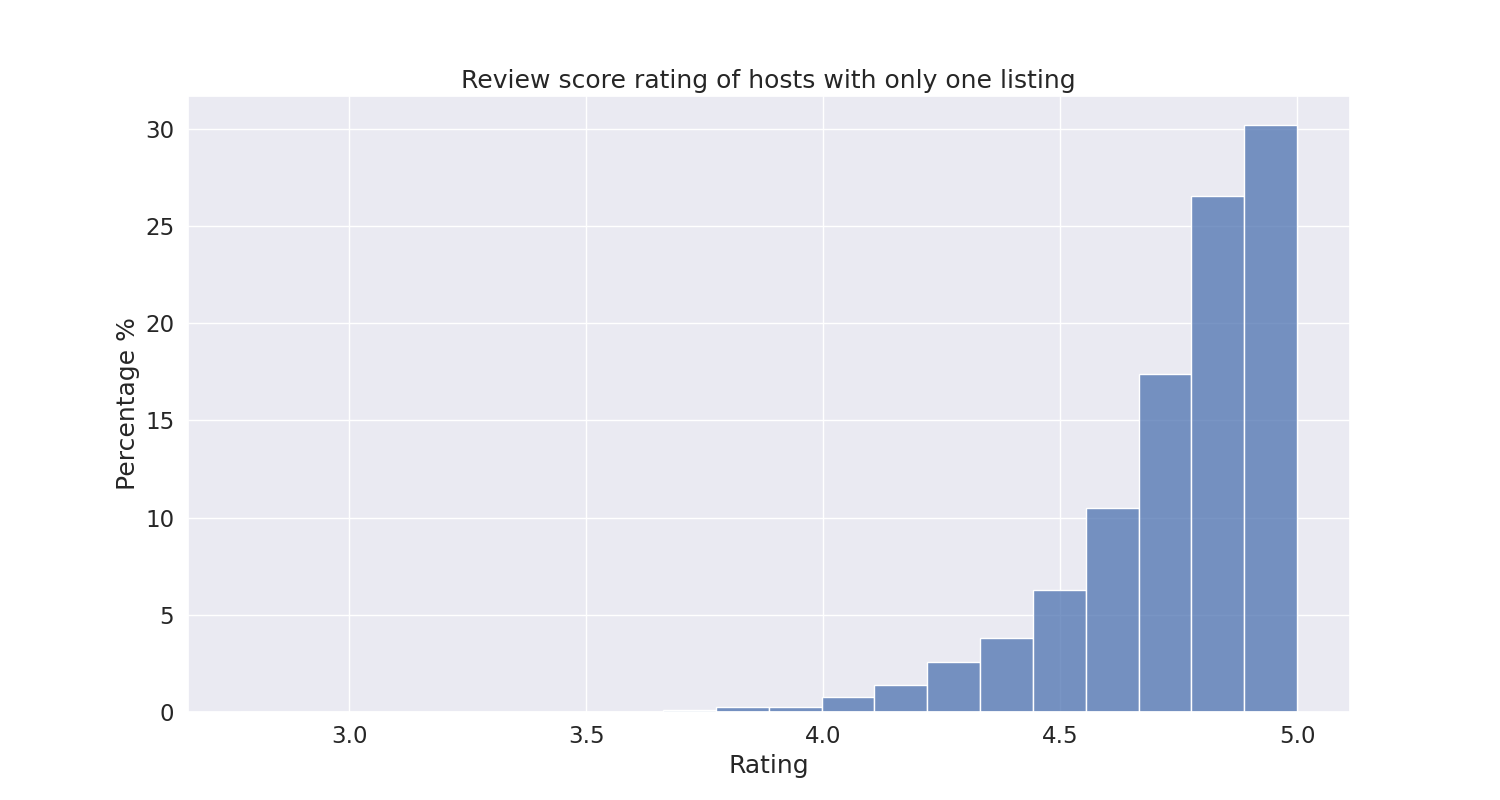

In [62]:
create_hist(data_scoring_unique,'Review score rating of hosts with only one listing',xlabel='Rating',ylabel='Percentage %')

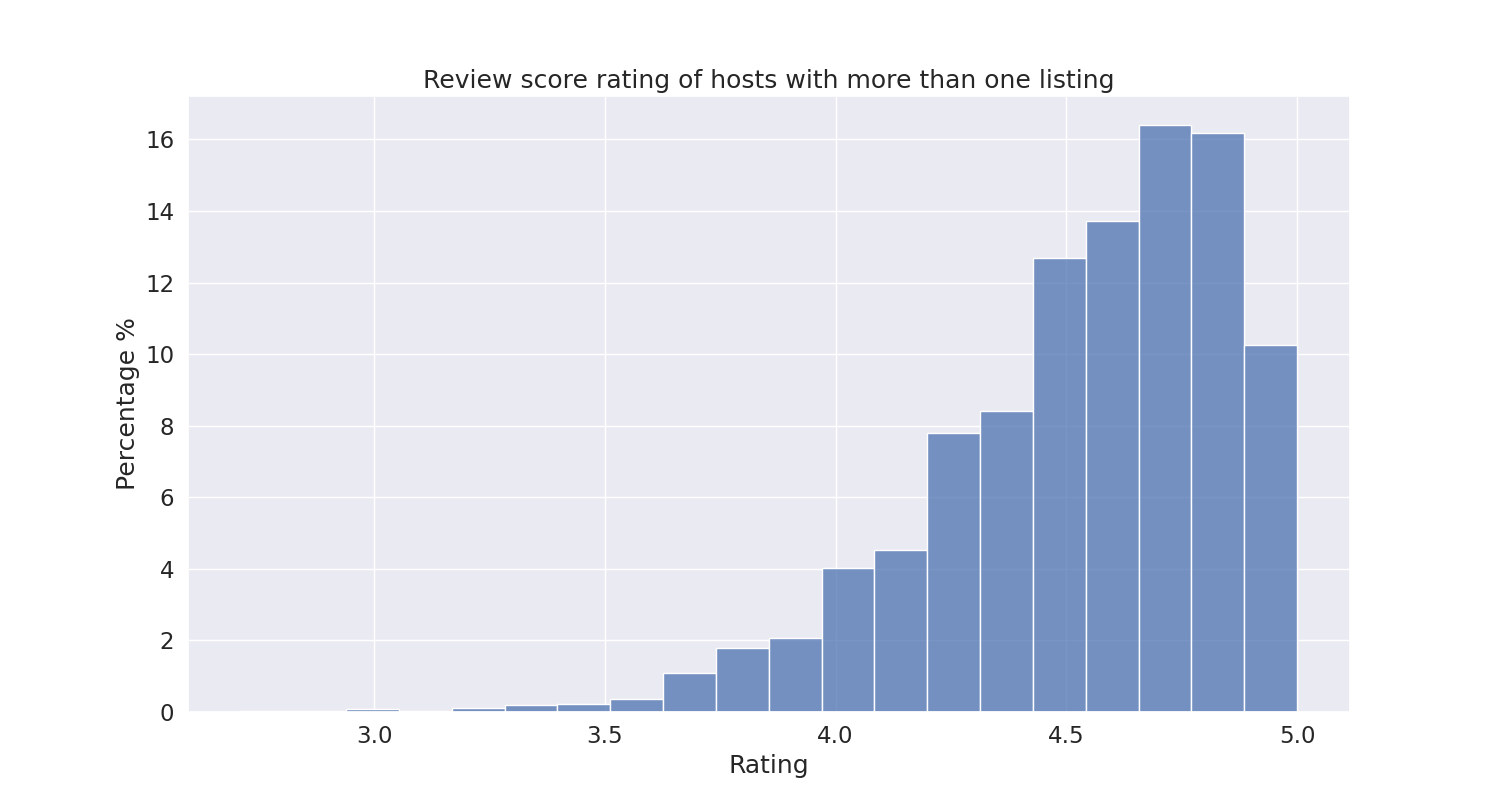

In [63]:
create_hist(data_scoring_multiple,'Review score rating of hosts with more than one listing',xlabel='Rating',ylabel='Percentage %')